In [2]:
# IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

The data is collected from the crimes reported to the NIBRS (National Incident-Based Reporting System). NIBRS comes under CJIS (Crime Justice Information Services). UCR (Uniform Crime Reporting) produces reliable statistics which can be used in law enforcement and documented by approved police incident reports. This data is put together by ‘EJustice.’ EJustice is a respected law enforcement system. It is used by Montgomery County Police Department and many other law firms. It is a record management system. It determines where most crimes are taking place and which crimes are increasing. The data given are the crime statistics in Montgomery County, which are differentiated majorly based on Dispatch/Time Date, Crime Names, Number of victims, Police District Names, City, State, and Zip code. 

In [3]:
# Importing the data
# Changing datatype of the column start date and end date, without parsedate it will importing as an object, with parsedate it will import as an datetime.

pd.set_option('display.max_columns', None)
df=pd.read_csv('C:/Users/Downloads//Crime.csv', parse_dates=['Dispatch Date / Time', 'Start_Date_Time', 'End_Date_Time'], low_memory=False)

In [4]:
# Display First 5 Rows from the Dataset.
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N1,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaT,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,GAITHERSBURG,MD,20878.0,GPD,Hotel/Motel/Etc.,P,6P2,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


# INITIAL DATA ANALYSIS

<h2> 1 Quality of Data </h2>
<h4> a) Size of the dataset</h4>

In [5]:
# Get the count of Tuples and Attributes.
# Size of dataset

print ('This Dataset contains the '+ str(df.shape[0]) +' Tuples and '+ str(df.shape[1]) +' Attributes.')

This Dataset contains the 306094 Tuples and 30 Attributes.


In [6]:
print(df.columns.tolist())
display(df[1:2].T)

['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time', 'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name', 'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type', 'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude', 'Police District Number', 'Location']


,1
Incident ID,201181293
Offence Code,3522
CR Number,180015424
Dispatch Date / Time,2018-03-30 01:00:55
NIBRS Code,35A
Victims,1
Crime Name1,Crime Against Society
Crime Name2,Drug/Narcotic Violations
Crime Name3,DRUGS - OPIUM OR DERIVATIVE - POSSESS
Police District Name,BETHESDA


# Understanding the Datasets


The various aspects of the Incident and Crime data consists of the following data columns.
<ul>
    <li><b>Incident ID:</b> Police Incident Number</li>
    <li><b>Offence Code:</b> Offense_Code is the code for an offense committed within the incident as defined by the National Incident-Based Reporting System (NIBRS) of the Criminal Justice Information Services (CJIS) Division Uniform Crime Reporting (UCR) Program.</li>
    <li><b>CR Number:</b> Police Report Number</li>
    <li><b>Dispatch Date / Time:</b> The actual date and time a Officer was dispatched</li>
    <li><b>NIBRS Code:</b> FBI NIBRS codes</li>
    <li><b>Victims:</b> Number of Victims</li>
    <li><b>Crime Name1:</b> Crime against Society/Person/Property or Other</li>
    <li><b>Crime Name2:</b> Describes the NIBRS_CODE</li>
    <li><b>Crime Name3:</b> Describes the OFFENSE_CODE</li>
    <li><b>Police District Name:</b> Name of District (Rockville,Weaton etc.)</li>
    <li><b>Block Address:</b> Address in 100 block level</li>
    <li><b>City:</b> City</li>
    <li><b>State:</b> State</li>
    <li><b>Zip Code:</b> Zip code</li>
    <li><b>Agency:</b> Assigned Police Department</li>
    <li><b>Place:</b> Place description</li>
    <li><b>Sector:</b> Police sector name, a subset of District</li>
    <li><b>Beat:</b> Police patrol area, a subset of Sector</li>
    <li><b>PRA:</b> Police Response Area, a subset of Beat</li>
    <li><b>Address Number:</b> House or Business Number</li>
    <li><b>Street Prefix:</b> North, South, East, West</li>
    <li><b>Street Name:</b> Street Name</li>
    <li><b>Street Suffix:</b> Quadrant (NW, SW, etc)</li>
    <li><b>Street Type:</b> Ave, Drive, Road, etc</li>
    <li><b>Start_Date_Time:</b> Occurred from date/time</li>
    <li><b>End_Date_Time:</b> Occurred to date/time</li>
    <li><b>Latitude:</b> Latitude</li>
    <li><b>Longitude:</b> Longitude</li>
    <li><b>Police District Number:</b> Major Police Boundary</li>
    <li><b>Location:</b> Location</li>
</ul>

<h4> b) Frequency counts </h4>

In [7]:
df.info()  # Gives a summary of data. This includes list of all columns with their data types
           # and the number of non-null values in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Incident ID             306094 non-null  int64         
 1   Offence Code            306094 non-null  object        
 2   CR Number               306094 non-null  int64         
 3   Dispatch Date / Time    257065 non-null  datetime64[ns]
 4   NIBRS Code              306094 non-null  object        
 5   Victims                 306094 non-null  int64         
 6   Crime Name1             305822 non-null  object        
 7   Crime Name2             305822 non-null  object        
 8   Crime Name3             305822 non-null  object        
 9   Police District Name    306000 non-null  object        
 10  Block Address           279888 non-null  object        
 11  City                    304818 non-null  object        
 12  State                   306094

In [8]:
df['Offence Code'].value_counts() # Finding Frequency in the column of Offence code.

2305    26275
9199    18489
1399    17441
2303    16076
3562    15613
        ...  
1106        1
1499        1
5402        1
4006        1
5199        1
Name: Offence Code, Length: 342, dtype: int64

In [9]:
df.isna().sum() # Gives count of missing values for each attribute in the data set

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

In [10]:
# To check for any duplicate data
df.duplicated().sum()

0

<h4> c) Descriptive/Summary statistics </h4>

In [11]:
# df.describe(include='all').transpose() 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Incident ID,306094.0,2.012369e+08,8.626185e+04,2.010871e+08,2.011625e+08,2.012361e+08,2.013109e+08,201387238.0
CR Number,306094.0,1.692787e+08,6.210304e+07,1.001107e+07,1.705431e+08,1.900183e+08,2.000466e+08,220421124.0
Victims,306094.0,1.022692e+00,1.923108e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,22.0
Zip Code,302915.0,2.087654e+04,1.701577e+02,6.000000e+00,2.085300e+04,2.087800e+04,2.090400e+04,29882.0
Address Number,279985.0,8.393001e+03,1.526296e+04,1.000000e+00,1.600000e+03,8.100000e+03,1.250000e+04,2090600.0
Latitude,306094.0,3.814633e+01,5.974082e+00,0.000000e+00,3.902039e+01,3.907284e+01,3.914207e+01,90.0
Longitude,306094.0,-7.526949e+01,1.178612e+01,-7.751675e+01,-7.719712e+01,-7.709946e+01,-7.702905e+01,0.0


In [12]:
# mode of Police District Name 
# This indicates the District where most number of crimes are reported
df['Police District Name'].mode()

0    SILVER SPRING
Name: Police District Name, dtype: object

In [13]:
# different Crime types
df['Crime Name1'].unique()

array(['Crime Against Society', 'Crime Against Property',
       'Crime Against Person', 'Other', 'Not a Crime', nan], dtype=object)

In [14]:
# Most reported Crime type
df['Crime Name1'].mode()

0    Crime Against Property
Name: Crime Name1, dtype: object

<h4> d) Outliers detection</h4>

c:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Victims'>

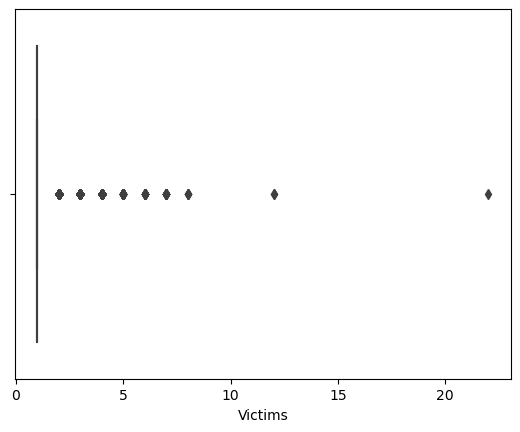

In [15]:
sns.boxplot(df['Victims'])

In [16]:
print(np.where(df['Victims']>10)) # Outliers positions

(array([ 46812,  53084, 112793], dtype=int64),)


<h4> e) Normality </h4>

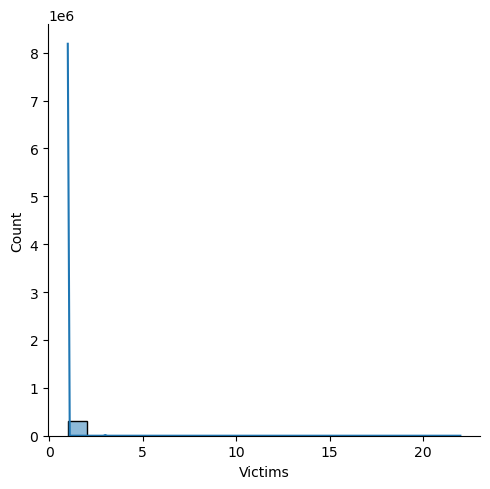

In [17]:
sns.displot(data=df['Victims'], kde = True)

# 2) Quality of measurements

In [18]:
from pandas_profiling import ProfileReport

# profile = ProfileReport(df)
# profile.to_file("output.html")

# After Executing above command we have include that file along with this .ZIP file, please have a look.

<h2> 3) Data transformation </h2>

In [19]:
# Add a new column 'Year' to the data frame to represent the crime occurance year.
df['Year'] = pd.DatetimeIndex(df['Start_Date_Time']).year

In [20]:
# Add a new column Hour to represent the daytime at which the crime is occured
df['Hour'] = df['Start_Date_Time'].apply(pd.to_datetime, dayfirst=True).dt.hour

In [21]:
# add a column 'Crime Count' representing each row as a crime record
df['Crime Count'] = df.index.value_counts()

In [22]:
# Street Prefix and Street Suffix havinig an maximum null values, so we are going to remove that.
# EDA1: Finding null values and dealing with missing values with appropriate justification.

df.drop('Street Prefix', axis=1, inplace=True)
df.drop('Street Suffix', axis=1, inplace=True)

In [23]:
# Display the data on sorting of date & time to show latest incident first and then later on.
# We added inplace True that means this dataframe will always show in order of start datetime in ucoming cells.

df.sort_values('Start_Date_Time', ascending=False, inplace=True)
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Hour,Crime Count
109962,201387229,9101,220033938,2022-08-07 18:15:25,90Z,1,Other,All Other Offenses,SUDDEN DEATH,GERMANTOWN,18000 BLK COTTAGE GARDEN DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N2,448,18000.0,COTTAGE GARDEN,DR,2022-08-07 18:15:00,NaT,39.15247,-77.2746,5D,"(39.1525, -77.2746)",2022,18,1
109963,201387232,1313,220033932,2022-08-07 18:02:57,13B,1,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,WHEATON,2400 BLK REEDIE DR,SILVER SPRING,MD,20902.0,MCPD,Community Center,L,4L2,324,2400.0,REEDIE,DR,2022-08-07 18:02:00,NaT,39.03863,-77.0509,4D,"(39.0386, -77.0509)",2022,18,1
109961,201387228,2999,220033935,2022-08-07 18:08:13,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),GERMANTOWN,13200 BLK COUNTRY RIDGE DR,GERMANTOWN,MD,20874.0,MCPD,Residence -Townhouse/Duplex,N,5N1,702,13200.0,COUNTRY RIDGE,DR,2022-08-07 17:35:00,NaT,39.18422,-77.2715,5D,"(39.1842, -77.2715)",2022,17,1
109958,201387217,2999,220033919,2022-08-07 15:43:13,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),WHEATON,3100 BLK OLNEY SANDY SPRING RD,OLNEY,MD,20832.0,MCPD,Street - In vehicle,J,4J2,642,3100.0,OLNEY SANDY SPRING,RD,2022-08-07 15:43:00,NaT,39.15067,-77.0628,4D,"(39.1507, -77.0628)",2022,15,1
109957,201387215,9108,220033916,2022-08-07 15:34:28,90Z,1,Other,All Other Offenses,RECOVERED PROPERTY - MONT CO.,ROCKVILLE,1 BLK MANNAKEE ST,ROCKVILLE,MD,20850.0,GPD,School - College/University,A,1A3,245,1.0,MANNAKEE,ST,2022-08-07 15:42:00,NaT,39.08567,-77.1675,1D,"(39.0857, -77.1675)",2022,15,1


For analysing the given dataset, three new columns are added. Added a column ‘Crime Count’ representing each row as a crime record. By splitting the Start_Date_Time column, a new column Hour is added to represent the hour at which the crime occurred and another column Year to represent the year value. Street Prefix and Street Suffix attributes have maximum null values. This analysis doesn’t use those attributes. So removed those columns. Finally, sorted the data on the basis of date & time to show latest incident first and then later on. 

<h2> 4) Characteristics of dataset </h2>

<h4> a) Data set</h4>

In [24]:
df.head(8) # Printing the top 8 rows of the data set

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Hour,Crime Count
109962,201387229,9101,220033938,2022-08-07 18:15:25,90Z,1,Other,All Other Offenses,SUDDEN DEATH,GERMANTOWN,18000 BLK COTTAGE GARDEN DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N2,448,18000.0,COTTAGE GARDEN,DR,2022-08-07 18:15:00,NaT,39.15247,-77.2746,5D,"(39.1525, -77.2746)",2022,18,1
109963,201387232,1313,220033932,2022-08-07 18:02:57,13B,1,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,WHEATON,2400 BLK REEDIE DR,SILVER SPRING,MD,20902.0,MCPD,Community Center,L,4L2,324,2400.0,REEDIE,DR,2022-08-07 18:02:00,NaT,39.03863,-77.0509,4D,"(39.0386, -77.0509)",2022,18,1
109961,201387228,2999,220033935,2022-08-07 18:08:13,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),GERMANTOWN,13200 BLK COUNTRY RIDGE DR,GERMANTOWN,MD,20874.0,MCPD,Residence -Townhouse/Duplex,N,5N1,702,13200.0,COUNTRY RIDGE,DR,2022-08-07 17:35:00,NaT,39.18422,-77.2715,5D,"(39.1842, -77.2715)",2022,17,1
109958,201387217,2999,220033919,2022-08-07 15:43:13,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),WHEATON,3100 BLK OLNEY SANDY SPRING RD,OLNEY,MD,20832.0,MCPD,Street - In vehicle,J,4J2,642,3100.0,OLNEY SANDY SPRING,RD,2022-08-07 15:43:00,NaT,39.15067,-77.0628,4D,"(39.1507, -77.0628)",2022,15,1
109957,201387215,9108,220033916,2022-08-07 15:34:28,90Z,1,Other,All Other Offenses,RECOVERED PROPERTY - MONT CO.,ROCKVILLE,1 BLK MANNAKEE ST,ROCKVILLE,MD,20850.0,GPD,School - College/University,A,1A3,245,1.0,MANNAKEE,ST,2022-08-07 15:42:00,NaT,39.08567,-77.1675,1D,"(39.0857, -77.1675)",2022,15,1
109952,201387209,1399,220033908,2022-08-07 13:59:31,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,300 BLK MAIN ST,GAITHERSBURG,MD,20878.0,MCPD,Street - Commercial,P,6P2,450,300.0,MAIN,ST,2022-08-07 13:59:00,NaT,39.12202,-77.2384,6D,"(39.122, -77.2384)",2022,13,1
109947,201387205,9199,220033905,2022-08-07 13:02:19,90Z,1,Other,All Other Offenses,POLICE INFORMATION,WHEATON,17800 BLK BUEHLER RD,OLNEY,MD,20832.0,MCPD,Residence - Apartment/Condo,J,4J2,642,17800.0,BUEHLER,RD,2022-08-07 13:02:00,NaT,39.14863,-77.0644,4D,"(39.1486, -77.0644)",2022,13,1
109948,201387206,2404,220033901,2022-08-07 12:41:05,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,SILVER SPRING,NaN,SILVER SPRING,MD,20993.0,MCPD,Street - Residential,H,3H2,142,NaN,NEW HAMPSHIRE,AVE,2022-08-07 12:41:00,NaT,0.00000,0.0000,3D,"(0.0, 0.0)",2022,12,1


In [25]:
df.tail(8) # Printing the bottom 8 rows of the dataset

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Hour,Crime Count
151883,201130906,2308,170503555,2017-04-22 13:26:10,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,1100 BLK E WEST HWY,SILVER SPRING,MD,20910.0,MCPD,Residence - Apartment/Condo,G,3G1,668,1100.0,WEST,HWY,2016-07-01,2017-04-22 13:05:00,38.988265,-77.027388,3D,"(38.9883, -77.0274)",2016,0,1
118678,201096562,1103,16044916,NaT,11A,3,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,2000 BLK MAYFLOWER DR,SILVER SPRING,MD,20905.0,MCPD,Residence - Single Family,J,4J1,385,2000.0,MAYFLOWER,DR,2016-07-01,NaT,39.099777,-76.970574,4D,"(39.0998, -76.9706)",2016,0,1
121824,201095974,2404,16044139,NaT,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,BETHESDA,4700 BLK CHELTENHAM DR,BETHESDA,MD,20814.0,MCPD,Parking Garage - Commercial,D,2D2,047,4700.0,CHELTENHAM,DR,2016-07-01,2016-07-02 00:00:00,38.988394,-77.093650,2D,"(38.9884, -77.0937)",2016,0,1
115422,201104004,2411,16054218,NaT,90Z,1,Crime Against Society,All Other Offenses,UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING),MONTGOMERY VILLAGE,600 BLK WHISPERING WIND CT,GAITHERSBURG,MD,20877.0,GPD,Other/Unknown,P,6P3,419,600.0,WHISPERING WIND,CT,2016-07-01,2016-10-21 12:30:00,39.144402,-77.185084,6D,"(39.1444, -77.1851)",2016,0,1
119741,201098114,2308,16046915,NaT,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,BETHESDA,1900 BLK ROSEMARY HILLS DR,SILVER SPRING,MD,20910.0,MCPD,Residence - Apartment/Condo,D,2D1,086,1900.0,ROSEMARY HILLS,DR,2016-07-01,2016-09-13 00:00:00,38.997703,-77.041965,2D,"(38.9977, -77.042)",2016,0,1
124671,201090726,2699,16037700,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD (DESCRIBE OFFENSE),GERMANTOWN,1 BLK VALLEYSIDE CT,GERMANTOWN,MD,20874.0,MCPD,Residence - Single Family,N,5N1,447,1.0,VALLEYSIDE,CT,2016-07-01,2016-07-25 00:00:00,39.171023,-77.256669,5D,"(39.171, -77.2567)",2016,0,1
112416,201103549,2699,16053730,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD (DESCRIBE OFFENSE),ROCKVILLE,13100 BLK OKINAWA AVE,ROCKVILLE,MD,20851.0,RCPD,Residence - Single Family,A,1A2,298,13100.0,OKINAWA,AVE,2016-07-01,2016-09-30 23:59:00,39.070464,-77.121500,1D,"(39.0705, -77.1215)",2016,0,1
56012,201103232,9105,16053356,NaT,90Z,1,Other,All Other Offenses,LOST PROPERTY,SILVER SPRING,10900 BLK NEW HAMPSHIRE AVE,SILVER SPRING,MD,20904.0,MCPD,Government Building,H,3H2,142,10900.0,NEW HAMPSHIRE,AVE,2016-07-01,2016-08-31 00:00:00,39.033464,-76.986127,3D,"(39.0335, -76.9861)",2016,0,1


# EXPLORATORY DATA ANALYSIS

(array([28241.,     0.,     0., 56288.,     0.,     0., 54334.,     0.,
            0.,     0., 51456.,     0.,     0., 44912.,     0.,     0.,
        43647.,     0.,     0., 27216.]),
 array([2016. , 2016.3, 2016.6, 2016.9, 2017.2, 2017.5, 2017.8, 2018.1,
        2018.4, 2018.7, 2019. , 2019.3, 2019.6, 2019.9, 2020.2, 2020.5,
        2020.8, 2021.1, 2021.4, 2021.7, 2022. ]),
 <BarContainer object of 20 artists>)

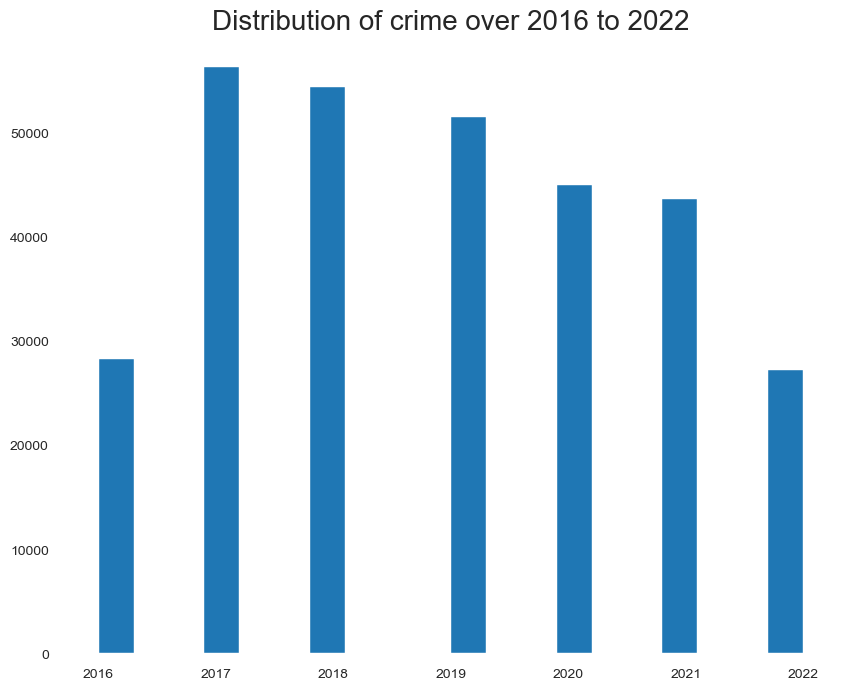

In [26]:
# Plotting the distribution of crimes over the years

plt.figure(figsize=(10,8), dpi=100)
plt.title(label='Distribution of crime over 2016 to 2022', fontsize=20)
plt.hist(df['Year'],bins=20)
# plt.savefig('plot_1.jpg')

 It is clear from the graph that the crime incidents are decreasing from 2017 through 2022. 
 Now we are going to find the distribution of different crime types. 

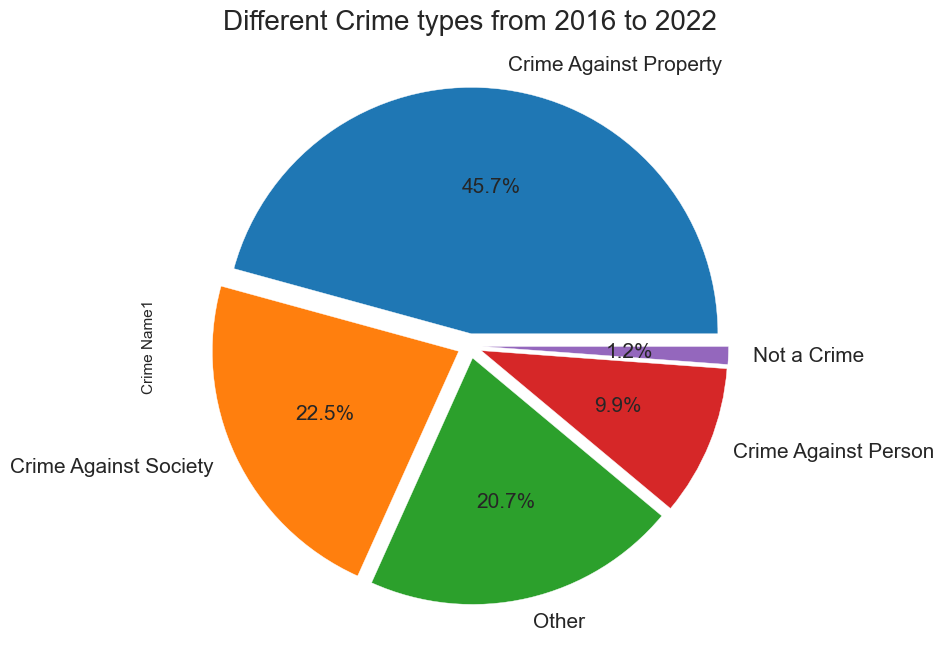

In [27]:
# Plotting the distribution of different crime types

plt.figure(figsize=(12,8),dpi=100)
df['Crime Name1'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0.05, 0.05],fontsize=15)
plt.title(label='Different Crime types from 2016 to 2022', fontsize=20)
plt.show() 
# plt.savefig('plot_2.jpg')

The pie chart shows that crime against property is the most reported crime throughout these years. It comes nearly half of the crime data we have. Nearly a quarter of the crime data is about the crime against society. Approximately 10 percent of the crimes were crimes against person.
Now we are going deep into the crime against property since it is the most reported crime type. Following lists, the number of different crimes against property. It is seen that theft from motor vehicle is more in number. 

In [28]:
# To find the count of different property crimes 

df_Crime_Against_Property= df[df['Crime Name1'] == 'Crime Against Property']
count_Crime_Name2=df_Crime_Against_Property['Crime Name2'].value_counts()
count_Crime_Name2

Theft From Motor Vehicle                       26275
Destruction/Damage/Vandalism of Property       18988
Shoplifting                                    16076
All other Larceny                              13951
Theft from Building                            11257
Burglary/Breaking and Entering                  8767
Identity Theft                                  8673
Theft of Motor Vehicle Parts or Accessories     6689
Motor Vehicle Theft                             6523
False Pretenses/Swindle/Confidence Game         6429
Credit Card/Automatic Teller Machine Fraud      4640
Robbery                                         3576
Counterfeiting/Forgery                          3147
Impersonation                                   1595
Pocket/picking                                   679
Embezzlement                                     464
Purse-snatching                                  402
Extortion/Blackmail                              383
Arson                                         

In [29]:
# Finding the mean value of Crime Name2
mean_Crime_Name2= df_Crime_Against_Property['Crime Name2'].value_counts().mean()
mean_Crime_Name2

5380.076923076923

In [30]:
# finding the crime types which counts greater than the average
df_Crime_Name2=count_Crime_Name2[count_Crime_Name2 > mean_Crime_Name2]
df_Crime_Name2

Theft From Motor Vehicle                       26275
Destruction/Damage/Vandalism of Property       18988
Shoplifting                                    16076
All other Larceny                              13951
Theft from Building                            11257
Burglary/Breaking and Entering                  8767
Identity Theft                                  8673
Theft of Motor Vehicle Parts or Accessories     6689
Motor Vehicle Theft                             6523
False Pretenses/Swindle/Confidence Game         6429
Name: Crime Name2, dtype: int64

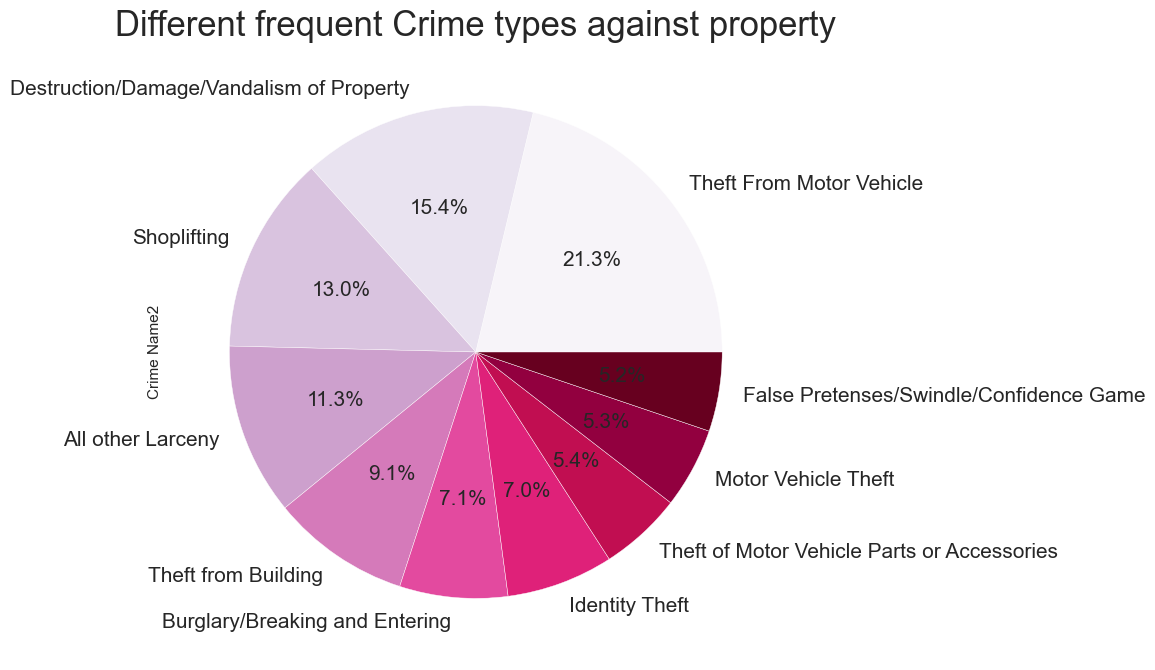

In [31]:
# Plotting different Crime types against property

plt.figure(figsize=(10,8),dpi=100)
df_Crime_Name2.plot.pie(autopct='%1.1f%%', fontsize=15, cmap='PuRd')
plt.title(label='Different frequent Crime types against property', fontsize=25)
plt.show() 
# plt.savefig('plot_2.jpg')

The pie chart above shows the different crimes against property which counts greater than the average of all the crimes against property. From the pie chart, it can be seen that theft from motor vehicle constitutes 21.3% of all the crimes against property. 

# CORRELATION ANALYSIS

In [32]:
df.head(2)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Hour,Crime Count
109962,201387229,9101,220033938,2022-08-07 18:15:25,90Z,1,Other,All Other Offenses,SUDDEN DEATH,GERMANTOWN,18000 BLK COTTAGE GARDEN DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N2,448,18000.0,COTTAGE GARDEN,DR,2022-08-07 18:15:00,NaT,39.15247,-77.2746,5D,"(39.1525, -77.2746)",2022,18,1
109963,201387232,1313,220033932,2022-08-07 18:02:57,13B,1,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,WHEATON,2400 BLK REEDIE DR,SILVER SPRING,MD,20902.0,MCPD,Community Center,L,4L2,324,2400.0,REEDIE,DR,2022-08-07 18:02:00,NaT,39.03863,-77.0509,4D,"(39.0386, -77.0509)",2022,18,1


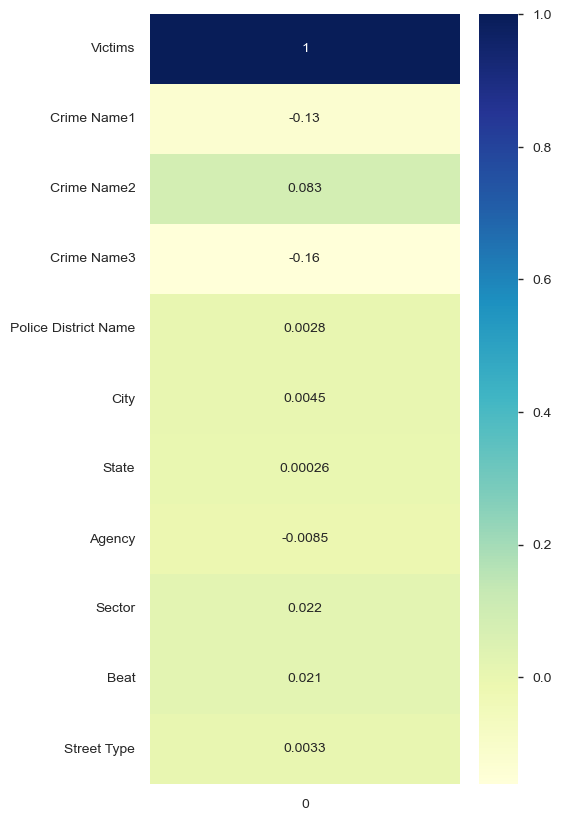

In [33]:
# Correlation Analysis
from scipy.stats import spearmanr

df_new = pd.DataFrame()
df_new['Victims'] = df['Victims']
df_new['Crime Name1'] = df['Crime Name1'].astype('category').cat.codes
df_new['Crime Name2'] = df['Crime Name2'].astype('category').cat.codes
df_new['Crime Name3'] = df['Crime Name3'].astype('category').cat.codes
df_new['Police District Name'] = df['Police District Name'].astype('category').cat.codes
df_new['City'] = df['City'].astype('category').cat.codes
df_new['State'] = df['State'].astype('category').cat.codes
df_new['Agency'] = df['Agency'].astype('category').cat.codes
df_new['Sector'] = df['Sector'].astype('category').cat.codes
df_new['Beat'] = df['Beat'].astype('category').cat.codes
# df_new['PRA'] = df['PRA'].astype('category').cat.codes
# df_new['Street Name'] = df['Street Name'].astype('category').cat.codes
df_new['Street Type'] = df['Street Type'].astype('category').cat.codes

correlation = df_new.corrwith(df_new.Victims)
fix, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(pd.DataFrame(correlation), annot=True, cmap='YlGnBu')

# corr = spearmanr(df_new).correlation
# plt.figure(figsize=(14, 12))
# ax = sns.heatmap(corr,
#             annot=True,
#             fmt='.2f',
#             linewidths=.5,
#             xticklabels=df_new.columns,
#             yticklabels=df_new.columns)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.title('Correlation Matrix', fontsize = 15)

plt.show()



# Research Questions

# 1. Which area has the highest number of crime incidents?

In [34]:
# find the district name which has reported most number of crimes
df['Police District Name'].mode()

0    SILVER SPRING
Name: Police District Name, dtype: object

<AxesSubplot:xlabel='count', ylabel='Police District Name'>

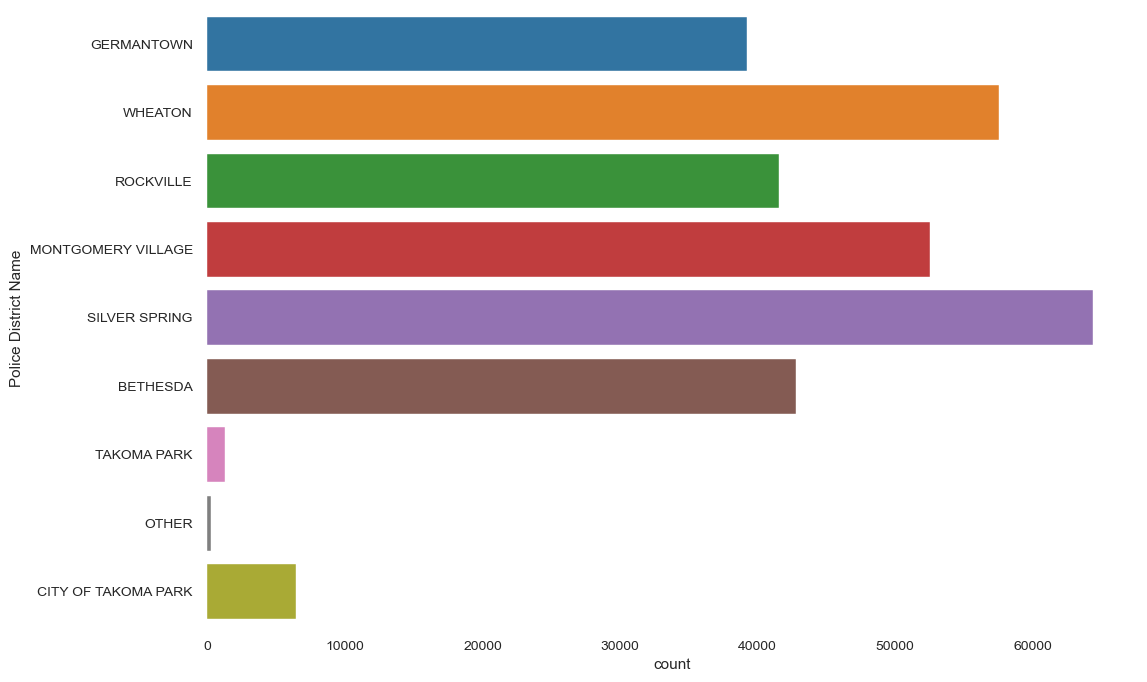

In [35]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, y='Police District Name')
# plt.savefig('Q1.jpg')

In [36]:
# To find the count of different property crimes 

df_Crime_At_SP= df[df['Police District Name'] == 'SILVER SPRING']
count_Crime_At_SP=df_Crime_At_SP['Street Name'].value_counts()
count_Crime_At_SP

GEORGIA          5600
COLESVILLE       3250
NEW HAMPSHIRE    2996
UNIVERSITY       2103
LOCKWOOD         1945
                 ... 
BELMONT             1
GREENSTONE          1
BOYER               1
FRANK               1
IONA                1
Name: Street Name, Length: 1084, dtype: int64

<AxesSubplot:>

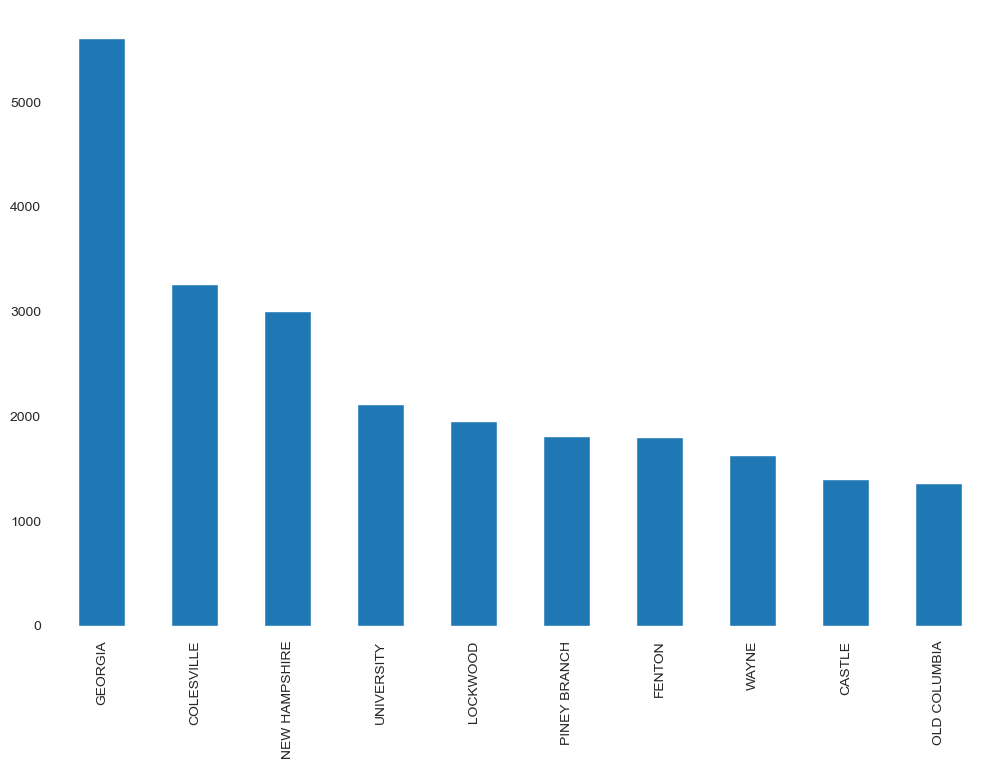

In [37]:
# Seleceted the first 10 street names of SILVER SPRING which has reported more number of crimes
df_Street_At_SP = count_Crime_At_SP[0:10]

plt.figure(figsize=(12,8),dpi=100)
df_Street_At_SP.plot(kind='bar')

# 2. Which crime is the most common in different areas of the state? 

<AxesSubplot:xlabel='Police District Name', ylabel='count'>

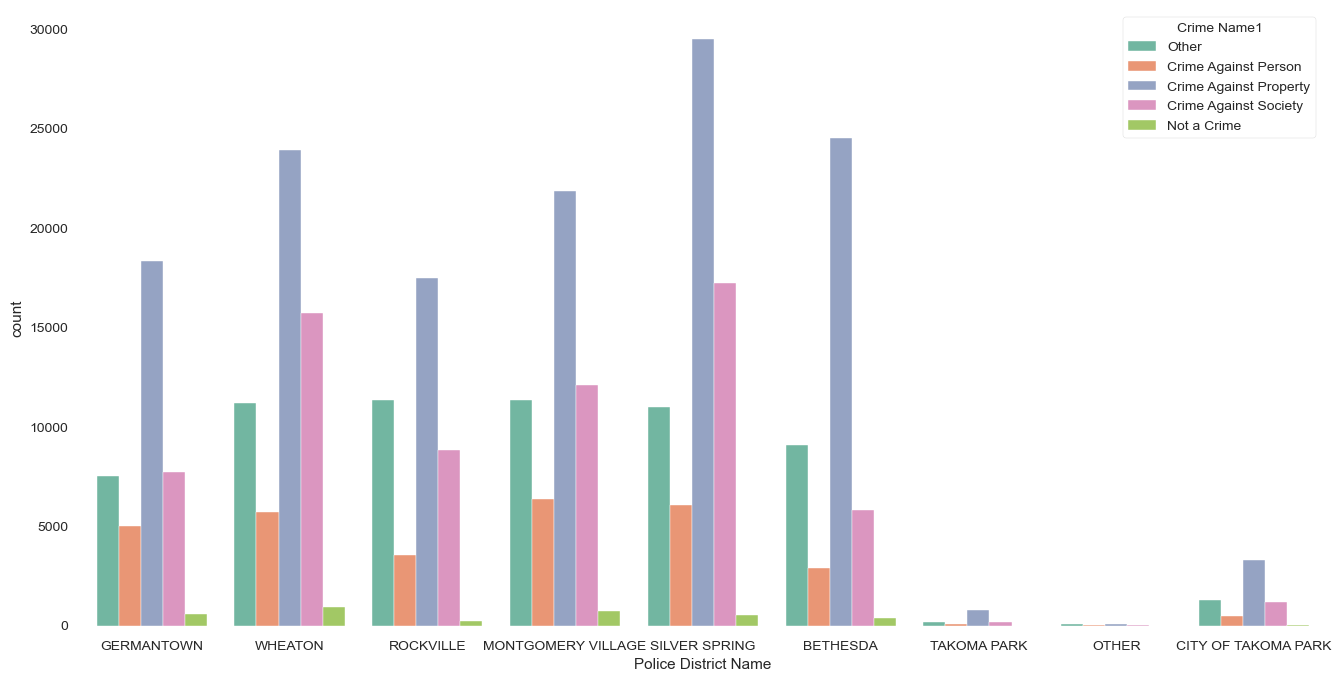

In [38]:
plt.figure(figsize=(16,8), dpi=100)
sns.countplot(data=df, x='Police District Name', hue='Crime Name1', palette='Set2')
# plt.savefig('Q2.jpg')

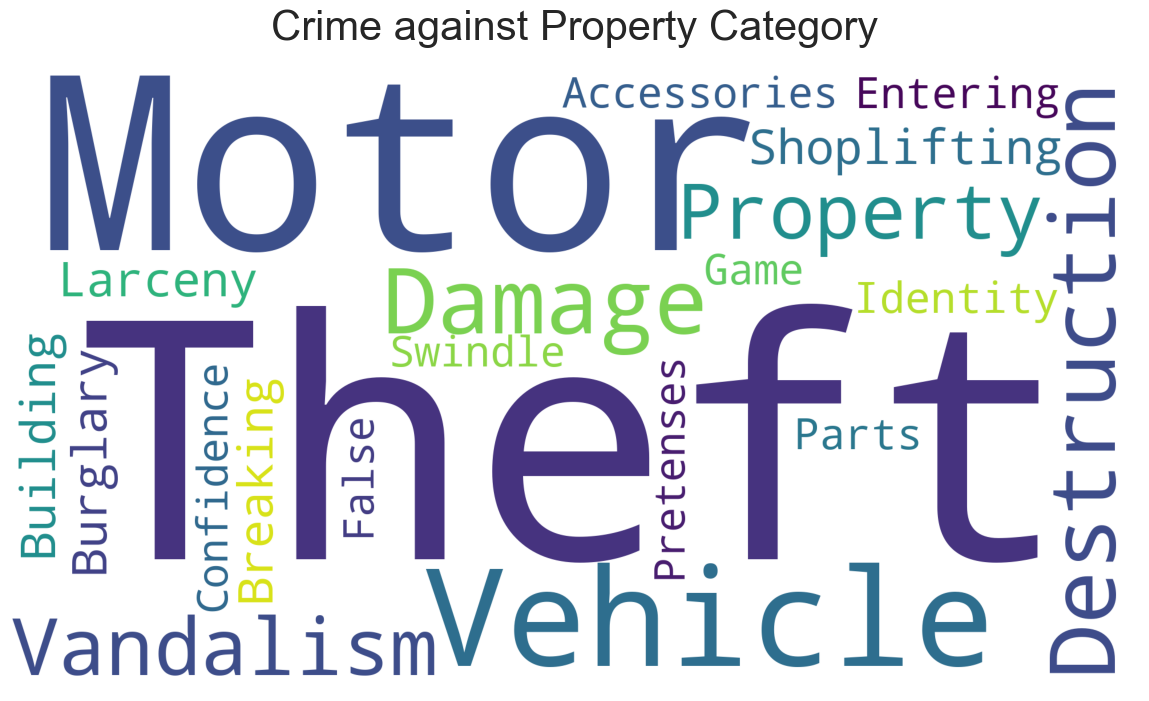

In [39]:
# Find which Crime Name2 in Crime Against Property is most occured

property_crime = df[df['Crime Name1'] == 'Crime Against Property']
total_count = property_crime['Crime Name2'].value_counts()
cp_top = total_count[total_count > total_count.mean()]

# cp_top.sort_values().plot.barh(title='Major categories of crimes against property', figsize=(10, 6))
# plt.xlabel('Numbers')

plt.figure(figsize=(20, 8))
plt.imshow(WordCloud(width=1980, height=1080, background_color="white", random_state=15).generate(" ".join(cp_top.index)))
plt.axis("off")
plt.title("Crime against Property Category", fontdict={"fontsize": 30}, pad=25)
plt.show()

# 3. Which police agency has quick response to the dispatch calls and how much time they consumed to resolve the crime? 

<AxesSubplot:xlabel='Agency', ylabel='value'>

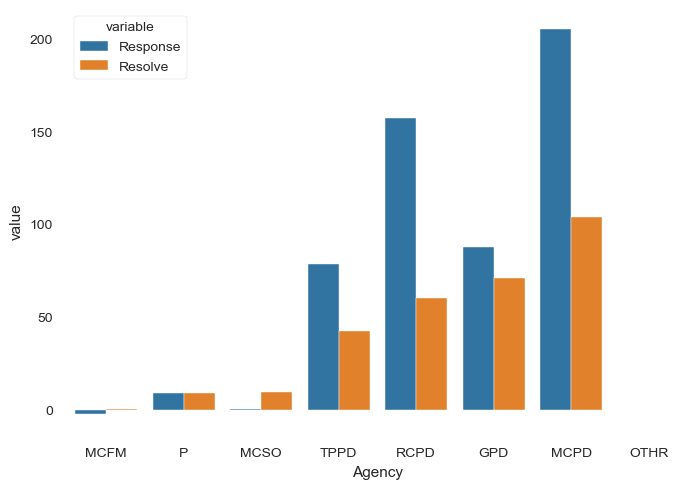

In [40]:
df['Response'] = (df['Dispatch Date / Time'] - df['Start_Date_Time']).astype('timedelta64[h]')
df[['Agency', 'Response']].groupby(['Agency']).mean().reset_index().sort_values('Response')

df['Resolve'] = (df['Dispatch Date / Time'] - df['End_Date_Time']).astype('timedelta64[h]')
musa = df[['Agency', 'Response', 'Resolve']].groupby(['Agency']).mean().reset_index().sort_values('Resolve')

sns.barplot(data=pd.melt(musa, id_vars='Agency', value_vars=['Response', 'Resolve']), x="Agency", y="value", hue="variable")


# 4. Increasing or decreasing crimes over the years 2016- 2022? 


In [41]:
# Get a new data frame which includes the number of different crimes reported in each year
df_CrimeCount = df.groupby('Year')['Crime Name1'].value_counts().unstack()
df_CrimeCount 

Crime Name1,Crime Against Person,Crime Against Property,Crime Against Society,Not a Crime,Other
Year,,,,,
2016,2498,12435,7812,340,5156
2017,4964,24267,15860,683,10501
2018,5130,21650,15839,625,11081
2019,4946,22026,13048,639,10762
2020,4423,22945,7127,514,9805
2021,5069,23086,5446,395,9567
2022,3240,13473,3785,379,6306


<AxesSubplot:title={'center':'Different Crimes over the years 2016-2022'}, xlabel='Year'>

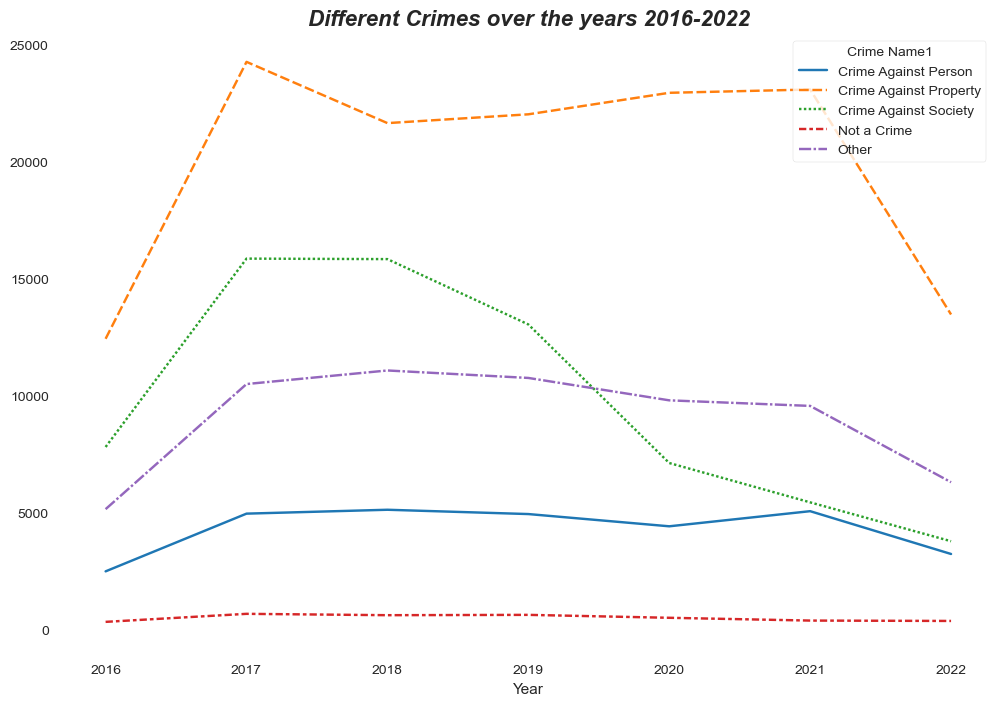

In [42]:
# To plot changes in the number of different crimes over the years
plt.figure(figsize=(12,8), dpi=100)
plt.xlabel=['Year']
plt.ylabel=['Number of Crimes']
plt.title('Different Crimes over the years 2016-2022', size=16, fontstyle='italic', weight=900)
sns.lineplot(data=df_CrimeCount)
# plt.savefig('Q4.jpg')

# 5. How are the time and the crime related to each other? 

<AxesSubplot:title={'center':'Crime count in different times of the day '}, xlabel='Hour'>

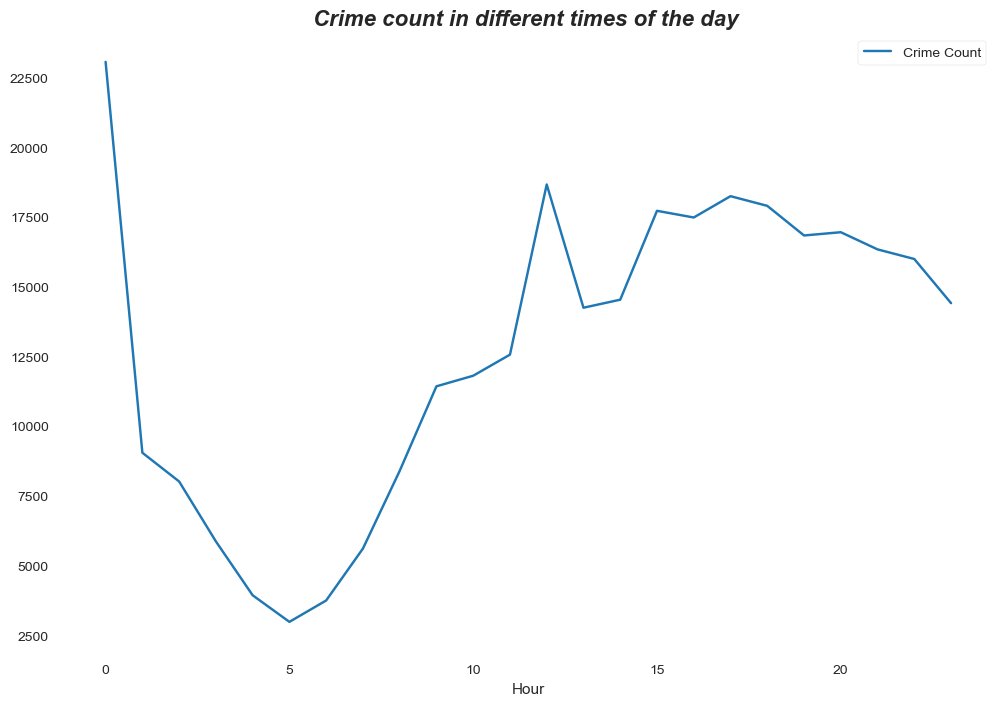

In [43]:

df_Crime_Time = df.groupby(df['Hour'])[['Crime Count']].sum()

plt.figure(figsize=(12,8), dpi=100)
plt.xlabel=['Hour']
plt.ylabel=['Number of Crimes']
plt.title('Crime count in different times of the day ', size=16, fontstyle='italic', weight=900)
sns.lineplot(data= df_Crime_Time)


# 6. Which street type has recorded the greatest number of crimes?


In [44]:
# sorting the street type and corresponding crime count
Street_Type_Count= df['Street Type'].value_counts()

# Finding the mean of the crime count in different street tyes
Mean_Street_Type_Count= df['Street Type'].value_counts().mean()

# selecting the street types which has crime count greater than the mean
df_Street_Type=Street_Type_Count[Street_Type_Count > Mean_Street_Type_Count]


df_Street_Type

RD     76111
AVE    65791
DR     51314
ST     19009
BLV    16287
LA     16221
CT     13980
Name: Street Type, dtype: int64

# 7. Which time has the lowest and highest number of crimes?

<AxesSubplot:xlabel='Hours', ylabel='Count'>

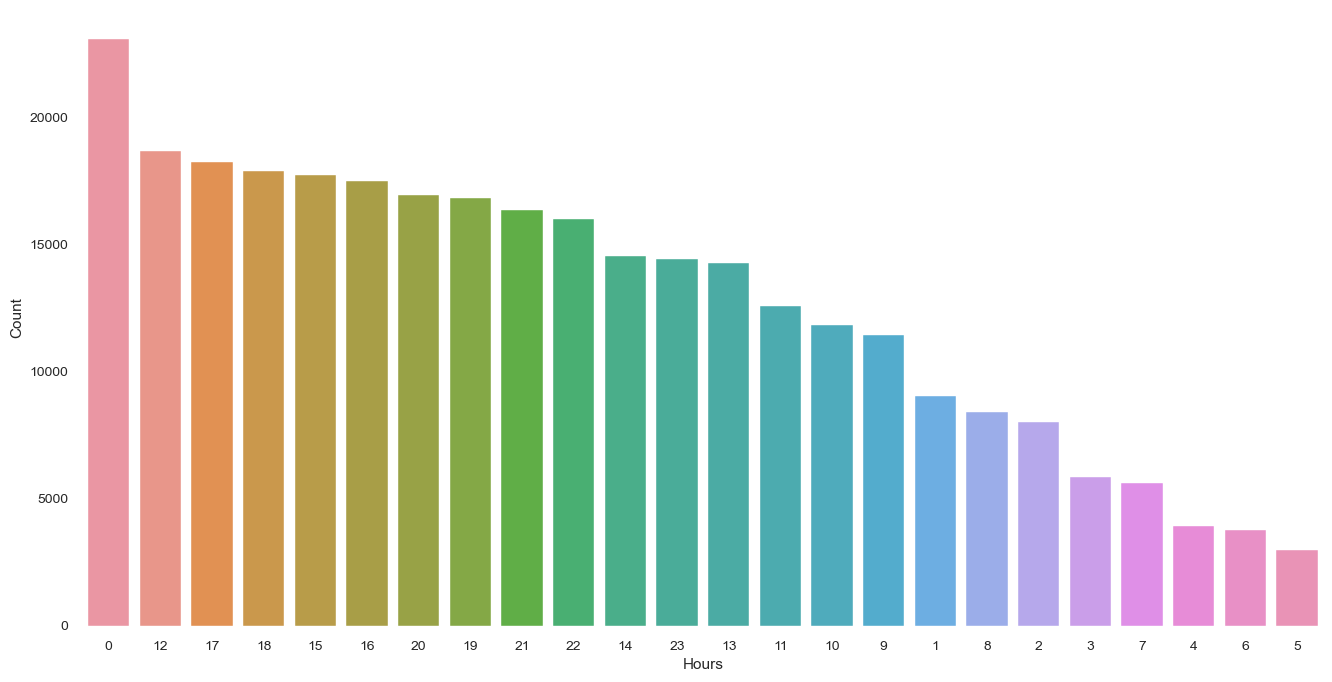

In [45]:
df['Hours'] = df.Hour.astype('str')
# df['Hours']

new_frame = pd.DataFrame()
new_frame = df[['Hours']].groupby('Hours').size().reset_index().rename(columns={0: 'Count'}).sort_values('Count', ascending=False)

plt.figure(figsize=(16,8), dpi=100)
sns.barplot(data=new_frame, x="Hours", y="Count")



# 8. Which crime incident have more victims 

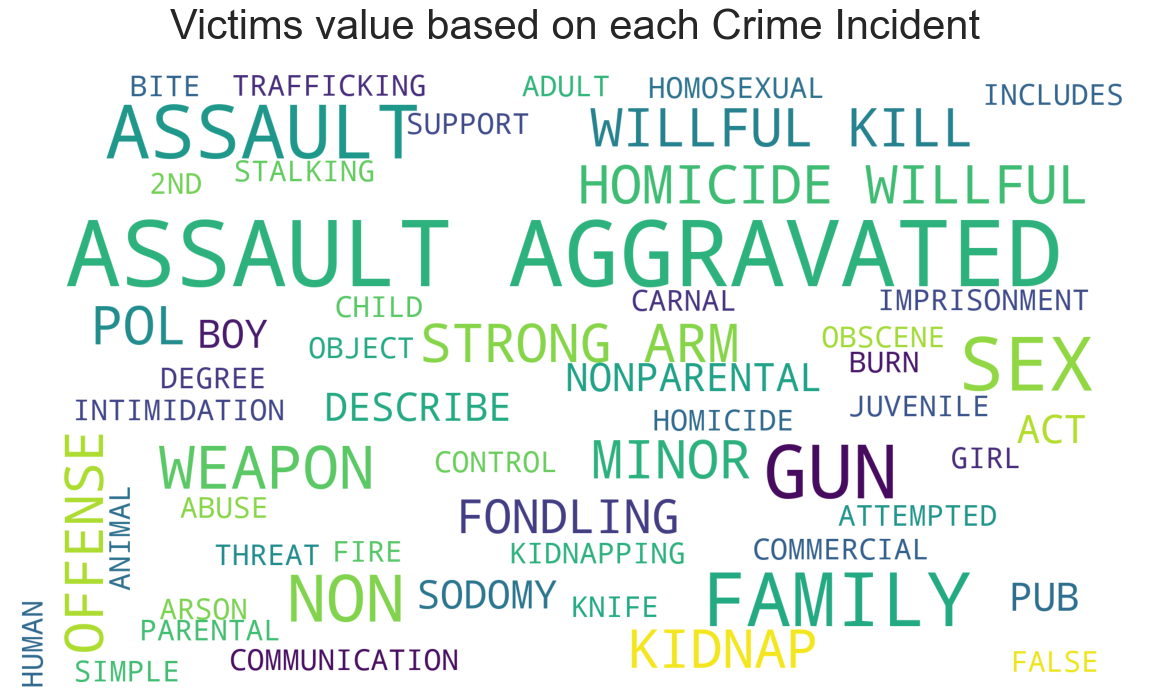

In [46]:
# calculate mean of Victims for different crime categories
df.groupby(['Crime Name1', 'Crime Name2', 'Crime Name3'])['Victims'].mean().sort_values(ascending=False)

# find mean of crime name3, mean by row
df_name3 = df.groupby('Crime Name3')['Victims'].mean().sort_values(ascending=False)
# column mean
name3_col_mean = df_name3.values.mean()
# filter crime name greater than column mean
text_name3 = df_name3[df_name3.values > name3_col_mean].index

#wordcloud plotting
text = " ".join(text_name3)
wc2 = WordCloud(width=1980, height=1080, background_color="white", random_state=13).generate(text)

plt.figure(figsize=(20, 8))
plt.imshow(wc2)
plt.axis("off")
plt.title("Victims value based on each Crime Incident", fontdict={"fontsize": 30}, pad=25)
plt.show()

# 9. What is the average duration of the crime?

<AxesSubplot:xlabel='Crime Name1', ylabel='diff'>

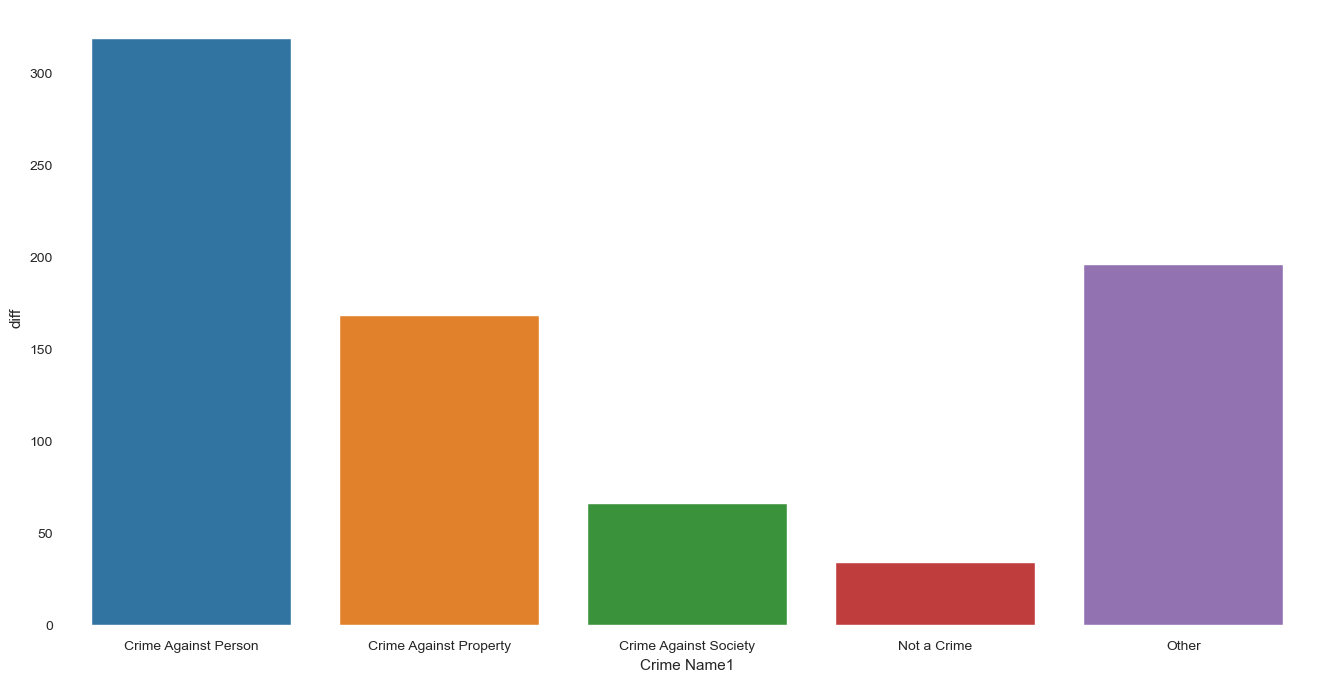

In [47]:
df['diff'] = (df['End_Date_Time'] - df['Start_Date_Time']).astype('timedelta64[h]')
df.groupby('Crime Name1').mean()

new_frame = pd.DataFrame()
new_frame = df[['diff', 'Crime Name1']].groupby('Crime Name1').mean().reset_index(drop=False)

plt.figure(figsize=(16,8), dpi=100)
sns.barplot(data=new_frame, x="Crime Name1", y="diff")


# 10. Which is the most common crime committed and is there a pattern for the same?

In [48]:
gdf = pd.DataFrame()
gdf = df.groupby(['Police District Name', 'Crime Name3']).size().to_frame().reset_index().rename(columns={0: 'Count'}).sort_values('Count', ascending=False)
gdf


,Police District Name,Crime Name3,Count
1459,SILVER SPRING,LARCENY - FROM AUTO,6222
138,BETHESDA,LARCENY - FROM AUTO,5070
1379,SILVER SPRING,DRUGS - MARIJUANA - POSSESS,4311
1224,ROCKVILLE,POLICE INFORMATION,4235
1868,WHEATON,LARCENY - FROM AUTO,4235
...,...,...,...
342,CITY OF TAKOMA PARK,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,1
339,CITY OF TAKOMA PARK,HEALTH - DRUGS - HEALTH OR SAFETY,1
335,CITY OF TAKOMA PARK,FRAUD AND ABUSE - COMPUTER,1
1700,TAKOMA PARK,THREAT - TERRORISTIC - STATE OFFENSES,1


# CONCLUSION

- Crime incidents in Montgomery county are decreasing since the year 2017.

- Crime against property is the most common crime in all the districts throught these years.

- Theft from motor vehicle is the most occured crime under crime against property.

- Most of the crimes are conducted during midnight.

- Silver spring is the most dangerous district with a high crime rate in the entire county.
